# Prepare Chicago Crime Data for a GitHub Repository

- Original Notebook Source: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
- Updated 11/17/22

>- This notebook will process a "Crimes - 2001 to Preset.csv" crime file in your Downloads folder and save it as smaller .csv's in a new "Data/Chicago/" folder inside this notebook's folder/repo.

# INSTRUCTIONS

- 1) Go to the Chicago Data Portal's page for ["Crimes - 2001 to Preset"](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2).

- 2) Click on the Export button on the top right and select CSV. 
    - Save the file to your Downloads folder instead of your repository. **The file is too big for a repository.**
    
    
    
- 3) Wait for the full file to download. 
    - It is very large (over >1.7GB and may take several minutes to fully download.)
    
    
- 4) Once the download is complete, change `RAW_FILE` variable below to match the filepath to the downloaded file.

## 🚨 Set the correct `RAW_FILE` path

- The cell below will attempt to check your Downloads folder for any file with a name that contains "Crimes_-_2001_to_Present".
    - If you know the file path already, you can skip the next cell and just manually set the RAW_FILE variable in the following code cell.

In [1]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')


- Your Downloads folder is 'C:\Users\cathe\Downloads/'



<span style="color:red"> **IF THE CODE ABOVE DID NOT FIND YOUR DOWNLOADED FILE, UNCOMMENT AND CHANGE THE `"YOUR FILEPATH HERE"` VARIABLE ONLY IN THE CELL BELOW**

In [2]:
## (Required) MAKE SURE TO CHANGE THIS VARIABLE TO MATCH YOUR LOCAL FILE NAME
##RAW_FILE = r"YOUR FILEPATH HERE")

<span style="color:red"> **DO NOT CHANGE ANYTHING IN THE CELL BELOW**

In [3]:
## DO NOT CHANGE THIS CELL
if RAW_FILE == r"YOUR FILEPATH HERE":
	raise Exception("You must update the RAW_FILE variable in the previous cell to match your local filepath.")
	
RAW_FILE

'C:\\Users\\cathe\\Downloads\\Crimes_-_2001_to_Present.csv'

In [4]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# 🔄 Full Workflow

- Now that your RAW_FILE variable is set either:
    - On the toolbar, click on the Kernel menu > "Restart and Run All".
    - OR click on this cell first, then on the toolbar click on the "Cell" menu > "Run All Below"

In [5]:
!pip install holidays


     -------------------------------------- 778.9/778.9 kB 7.1 MB/s eta 0:00:00


In [6]:
import pandas as pd
import holidays
import datetime as dt
from holidays import country_holidays
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885605,13128007,JG325985,06/21/2023 08:00:00 PM,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,35.0,21.0,14,1157169.0,1920611.0,2023,08/19/2023 03:40:26 PM,41.937926,-87.697782,"(41.937925817, -87.697782474)"
7885606,13128324,JG326502,05/13/2023 12:00:00 PM,020XX W CERMAK RD,1120,DECEPTIVE PRACTICE,FORGERY,CURRENCY EXCHANGE,False,False,...,25.0,31.0,10,1163211.0,1889404.0,2023,08/19/2023 03:40:26 PM,41.852166,-87.676455,"(41.85216632, -87.676455032)"
7885607,13128375,JG326564,06/24/2023 01:29:00 PM,069XX N HAMILTON AVE,1330,CRIMINAL TRESPASS,TO LAND,RESIDENCE,False,False,...,40.0,2.0,26,1160740.0,1946176.0,2023,08/19/2023 03:40:26 PM,42.008004,-87.683946,"(42.008003927, -87.683946124)"
7885608,13129172,JG327619,06/20/2023 04:00:00 AM,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,...,35.0,21.0,08B,1158868.0,1918755.0,2023,08/19/2023 03:40:26 PM,41.932798,-87.691589,"(41.932798095, -87.691589364)"


In [8]:
# this cell can take up to 1 min to run
date_format = "%m/%d/%Y %H:%M:%S %p"

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
2524114,1410662,G123231,01/01/2001 01:00:00 AM,007XX E 50 PL,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,...,NaN,08A,1181985.0,1871730.0,2001,08/17/2015 03:03:40 PM,41.803253,-87.608098,"(41.803252854, -87.608097536)",2001-01-01 01:00:00
2466059,1330412,G026686,01/01/2001 01:00:00 AM,019XX N HALSTED ST,0820,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,...,NaN,06,1170604.0,1913228.0,2001,08/17/2015 03:03:40 PM,41.917383,-87.648623,"(41.917382588, -87.648623098)",2001-01-01 01:00:00
2464654,1328315,G020979,01/01/2001 01:00:00 AM,067XX S JUSTINE ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,...,NaN,11,1167126.0,1859954.0,2001,08/17/2015 03:03:40 PM,41.771269,-87.662929,"(41.771269195, -87.662929135)",2001-01-01 01:00:00
2456438,1311626,G001009,01/01/2001 01:00:00 AM,023XX S TROY ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,14,1155692.0,1888116.0,2001,08/17/2015 03:03:40 PM,41.848786,-87.704087,"(41.848786421, -87.704086603)",2001-01-01 01:00:00
2456106,1310586,G000876,01/01/2001 01:00:00 AM,052XX S FAIRFIELD AV,0820,THEFT,$500 AND UNDER,STREET,False,False,...,NaN,06,1158889.0,1869741.0,2001,08/17/2015 03:03:40 PM,41.798298,-87.692856,"(41.798298315, -87.692856014)",2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119833,13196745,JG407740,09/02/2023 12:00:00 AM,035XX S COTTAGE GROVE AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,36.0,14,1181368.0,1881512.0,2023,09/09/2023 03:42:35 PM,41.830110,-87.610058,"(41.830109681, -87.610058377)",2023-09-02 12:00:00
119723,13198188,JG409450,09/02/2023 12:00:00 AM,052XX W WINONA ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,11.0,07,1140521.0,1933749.0,2023,09/09/2023 03:42:35 PM,41.974300,-87.758644,"(41.974300065, -87.75864402)",2023-09-02 12:00:00
120175,13196743,JG407554,09/02/2023 12:00:00 AM,034XX W BEACH AVE,041A,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,...,23.0,04B,1153154.0,1909425.0,2023,09/09/2023 03:42:35 PM,41.907311,-87.712836,"(41.907311224, -87.712835936)",2023-09-02 12:00:00
119800,13197347,JG408066,09/02/2023 12:00:00 AM,014XX N Wicker Park Ave,0810,THEFT,OVER $500,STREET,False,False,...,24.0,06,1163347.0,1909629.0,2023,09/09/2023 03:42:35 PM,41.907663,-87.675387,"(41.907662578, -87.675386795)",2023-09-02 12:00:00


## Separate the Full Dataset by Years

In [9]:
chicago_full['Datetime'].dt.year

2524114    2001
2466059    2001
2464654    2001
2456438    2001
2456106    2001
           ... 
119833     2023
119723     2023
120175     2023
119800     2023
119931     2023
Name: Datetime, Length: 7885610, dtype: int64

In [10]:
# save the years for every crime
chicago_full["Year"] = chicago_full['Datetime'].dt.year.astype(str)
chicago_full["Year"].value_counts()

2002    486807
2001    485888
2003    475985
2004    469422
2005    453773
2006    448179
2007    437088
2008    427183
2009    392827
2010    370514
2011    351993
2012    336320
2013    307537
2014    275790
2016    269827
2017    269103
2018    268905
2015    264788
2019    261336
2022    238901
2020    212210
2021    208847
2023    172387
Name: Year, dtype: int64

In [11]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [12]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1410662,01/01/2001 01:00:00 AM,ASSAULT,SIMPLE,RESIDENCE,False,True,223,2.0,NaN,2001,41.803253,-87.608098
2001-01-01 01:00:00,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,2001,41.917383,-87.648623
2001-01-01 01:00:00,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,2001,41.771269,-87.662929
2001-01-01 01:00:00,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,2001,41.848786,-87.704087
2001-01-01 01:00:00,1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,2001,41.798298,-87.692856
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-02 12:00:00,13196745,09/02/2023 12:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,212,2.0,4.0,2023,41.830110,-87.610058
2023-09-02 12:00:00,13198188,09/02/2023 12:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1623,16.0,45.0,2023,41.974300,-87.758644
2023-09-02 12:00:00,13196743,09/02/2023 12:00:00 AM,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,1422,14.0,26.0,2023,41.907311,-87.712836


In [13]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [14]:
FINAL_DROP = ['Year']

In [15]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.sort_index()
    temp_df = temp_df.reset_index(drop=True)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [16]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [17]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



## Confirmation

- Follow the example usage above to test if your files were created successfully.

In [18]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f, nrows=5) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1410662,01/01/2001 01:00:00 AM,ASSAULT,SIMPLE,RESIDENCE,False,True,223,2.0,NaN,41.803253,-87.608098
1,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,41.917383,-87.648623
2,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929
3,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704087
4,1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856
...,...,...,...,...,...,...,...,...,...,...,...,...
0,12938688,01/01/2023 01:00:00 AM,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,STREET,False,False,1632,16.0,38.0,41.944491,-87.787524
1,12939172,01/01/2023 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,412,4.0,8.0,41.740095,-87.578202
2,12939232,01/01/2023 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,7.0,41.758091,-87.554612
3,12938695,01/01/2023 01:00:00 AM,BATTERY,SIMPLE,STREET,False,False,122,1.0,42.0,41.880688,-87.631561


In [19]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    5
2002    5
2003    5
2004    5
2005    5
2006    5
2007    5
2008    5
2009    5
2010    5
2011    5
2012    5
2013    5
2014    5
2015    5
2016    5
2017    5
2018    5
2019    5
2020    5
2021    5
2022    5
2023    5
Name: Date, dtype: int64

## Summary

- The chicago crime dataset has now been saved to your repository as csv files. 
- You should save your notebook, commit your work and push to GitHub using GitHub desktop.

## Topics and Answers

# Topic 3: Comparing AM vs PM Rush Hour
Are crimes more common during AM rush hour or PM rush hour?
You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
You can consider any crime that occurred between 4 -7 PM as PM rush hour.
What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [30]:
## Get # of crimes by Hour
crimes_by_hour = df.groupby('Description')['Date'].value_counts().sort_index()
crimes_by_hour

Description           Date                  
$500 AND UNDER        01/01/2001 01:00:00 AM    2
                      01/01/2005 01:00:00 PM    1
                      01/01/2007 01:00:00 PM    1
                      01/01/2011 01:00:00 AM    1
                      01/01/2014 01:00:00 AM    1
                                               ..
TO PROPERTY           01/01/2023 01:00:00 AM    2
TO VEHICLE            01/01/2001 01:00:00 AM    1
                      01/01/2008 01:00:00 PM    1
                      01/01/2009 01:00:00 AM    1
UNLAWFUL USE HANDGUN  01/01/2007 01:00:00 AM    1
Name: Date, Length: 105, dtype: int64

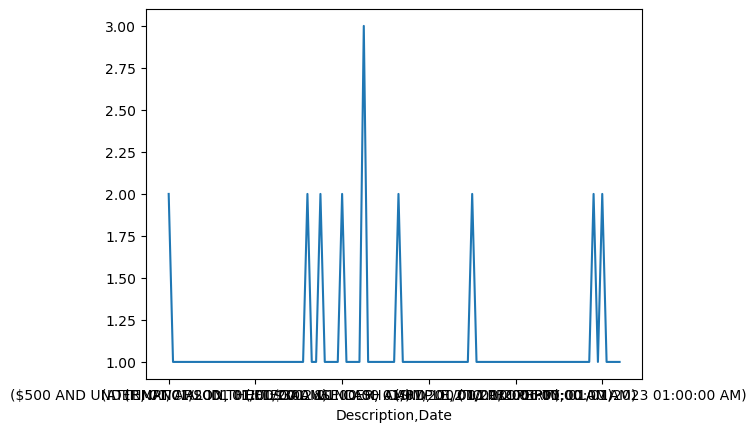

In [31]:
crimes_by_hour.plot();

In [32]:
## convert to dataframe and reset_index()
plot_df = crimes_by_hour.to_frame('# of Crimes').reset_index()
plot_df

,Description,Date,# of Crimes
0,$500 AND UNDER,01/01/2001 01:00:00 AM,2
1,$500 AND UNDER,01/01/2005 01:00:00 PM,1
2,$500 AND UNDER,01/01/2007 01:00:00 PM,1
3,$500 AND UNDER,01/01/2011 01:00:00 AM,1
4,$500 AND UNDER,01/01/2014 01:00:00 AM,1
...,...,...,...
100,TO PROPERTY,01/01/2023 01:00:00 AM,2
101,TO VEHICLE,01/01/2001 01:00:00 AM,1
102,TO VEHICLE,01/01/2008 01:00:00 PM,1
103,TO VEHICLE,01/01/2009 01:00:00 AM,1


In [33]:
ax = sns.lineplot(data=plot_df, x='HourOfDay',y='# of Crimes')

NameError: name 'sns' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=plot_df, x='HourOfDay',y='# of Crimes',markers=True,
                  hue='Description',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);

In [ ]:
g = sns.catplot(data=plot_df, x='HourOfDay', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Description', col='Description',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

In [ ]:
crime_perc_by_hour = df.groupby('Description')['HourOfDay'].value_counts(normalize=True).sort_index()
crime_perc_by_hour

In [ ]:
## Convert to dataframe and reset index
plot_df_perc = crime_perc_by_hour.to_frame('# of Crimes').reset_index()
plot_df_perc

In [ ]:
g = sns.(data=plot_df_perc, x='HourOfDay', y='# of Crimes',
                hue='Description', col='Description',col_wrap=2,
            aspect=2, height=4,
           kind='point',sharey=False,sharex=False);
[ax.grid(axis='x') for ax in g.axes];

In [ ]:
# looping through the value counts series
val_counts_by_hour = df.groupby('Description')['HourOfDay'].value_counts()
val_counts_by_hour

In [ ]:
## Getting all of the crimes from the first level of the index
crime_list = val_counts_by_hour.index.levels[0]
crime_list

In [ ]:
##selecting a test crime and slicing the result
crime='HOMICIDE'
val_counts_by_hour.loc[crime]

In [ ]:
## getting min and max values
val_counts_by_hour.loc[crime].agg(['min','max'])

In [ ]:
##  Getting indices for min and max
val_counts_by_hour.loc[crime].agg(['idxmin','idxmax'])

In [ ]:
g = sns.catplot(data=plot_df_perc, x='HourOfDay', y='# of Crimes',
                hue='Description', col='Description',col_wrap=2,
            aspect=2, height=4,
           kind='point',sharey=False,sharex=False);
## loop throught the axes dict
for col, ax in g.axes_dict.items():
    
    ## Extract the idx min and idxmax from the val counts
    min_, max_ = val_counts_by_hour.loc[col].agg(['idxmin','idxmax'])
    
    ## add vlines for both and SAVE THE LINE and a label to use in legend
    ln1 = ax.axvline(min_, color='darkgreen',ls='--')
    lab1 = f'Min(Hour={min_})'
    
    ln2 = ax.axvline(max_,color='darkred',ls='--')
    lab2 = f'Max(Hour={max_})'
    
    ## manually add legend using list of ln1 and ln2 and a list of labels
    ax.legend( [ln1,ln2], [lab1,lab2] )
    ## add x grid
    ax.grid(axis='x')
    
g.fig

# Topic 4: Comparing Months
Q1. What months have the most crime? What months have the least?

Q2.Are there any individual crimes that do not follow this pattern? If so, which crimes?

A1. During the Prime Summer months between April- August there is a spike in crime and during the Prime Winter months of October- January there is a spike in crime as well. Months of February, March, and September have the least amount of crime. 

A2. There are no individual crimes that do not follow this pattern.

# Topic 5: Comparing Holidays:
Q1: Are there any holidays that show an increase in the # of crimes?
Q2: Are there any holidays that show a decrease in the # of crimes?

A1. The main holiday that showed an increase of crime is New Years Day. 

A2. There are no  holidays that show a decrease in the # of crime.

In [20]:
## making a date range that covers full dataset
all_days = pd.date_range(df["Date"].min(), df["Date"].max())
all_days

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-02 01:00:00',
               '2001-01-03 01:00:00', '2001-01-04 01:00:00',
               '2001-01-05 01:00:00', '2001-01-06 01:00:00',
               '2001-01-07 01:00:00', '2001-01-08 01:00:00',
               '2001-01-09 01:00:00', '2001-01-10 01:00:00',
               ...
               '2022-12-23 01:00:00', '2022-12-24 01:00:00',
               '2022-12-25 01:00:00', '2022-12-26 01:00:00',
               '2022-12-27 01:00:00', '2022-12-28 01:00:00',
               '2022-12-29 01:00:00', '2022-12-30 01:00:00',
               '2022-12-31 01:00:00', '2023-01-01 01:00:00'],
              dtype='datetime64[ns]', length=8036, freq='D')

In [21]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [22]:
## Testing first date
print(all_days[0])
us_holidays.get(all_days[0])

2001-01-01 01:00:00


"New Year's Day"

In [23]:
## Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]
holiday_list[:5]

["New Year's Day", None, None, None, None]

In [24]:
# For a specific subdivisions (e.g. state or province):
md_holidays = country_holidays('US', subdiv='MD')
md_holidays

holidays.country_holidays('US', subdiv='MD')

In [25]:
## Saving both holiday types as columns
df["US Holiday"] = [us_holidays.get(day) for day in df['Date']]
df['MD Holiday'] = [md_holidays.get(day) for day in df['Date']]
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holiday,MD Holiday
0,1410662,01/01/2001 01:00:00 AM,ASSAULT,SIMPLE,RESIDENCE,False,True,223,2.0,NaN,41.803253,-87.608098,New Year's Day,New Year's Day
1,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,41.917383,-87.648623,New Year's Day,New Year's Day
2,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929,New Year's Day,New Year's Day
3,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704087,New Year's Day,New Year's Day
4,1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856,New Year's Day,New Year's Day


In [26]:
## US Holidays
df['US Holiday'].value_counts()

New Year's Day    115
Name: US Holiday, dtype: int64

In [27]:
## MD Holidays
df['MD Holiday'].value_counts()

New Year's Day    115
Name: MD Holiday, dtype: int64

In [28]:
## Saving a binary is holiday feature
df['Is_Holiday'] = df['US Holiday'].notna()
df['Is_Holiday'].value_counts()

True    115
Name: Is_Holiday, dtype: int64